In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
def roulette():
    x = np.random.randint(0, 37)
    isOdd = x%2
    isEven = not(isOdd)
    isRed = (x > 0 and x < 10 and isOdd) \
        or (x > 10 and x <= 18 and isEven) \
        or (x > 18 and x < 28 and isOdd) \
        or (x > 29 and x <= 36 and isEven)
    return x, isRed

In [3]:
while True:
    a = input()
    if a == 'q':
        break
    x, isRed = roulette()
    if x == 0:
        print('Zero')
    elif isRed:
        print(f'Red: {x}')
    else:
        print(f'Black: {x}')


Black: 31

Red: 30

Red: 27

Red: 27

Red: 18
q


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [4]:
def run_roulette(n):
    zero, red, black = 0, 0, 0
    
    for i in range(0, n):
        x, isRed = roulette()
        if x == 0:
            zero += 1
        elif isRed:
            red += 1
        else:
            black += 1

    return zero, red, black

In [5]:
n = 100

zero, red, black = run_roulette(n)
p_zero, p_red, p_black = zero/n, red/n, black/n

print(f'zero = {zero}, red = {red}, black = {black}')
print(f'P(zero) = {p_zero}, P(red) = {p_red}, P(black) = {p_black}')
print(f'P(zero) + P(red) + P(black) = {p_zero + p_red + p_black}')

zero = 1, red = 51, black = 48
P(zero) = 0.01, P(red) = 0.51, P(black) = 0.48
P(zero) + P(red) + P(black) = 1.0


2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

[3.4085222913430018, 5.781767122994821, 4.866422821198777, 4.075622595609676, 4.681449775228635, 5.59276588685068, 5.662346585222777, 6.402275939752986, 4.407913607878011, 5.755429280882246]


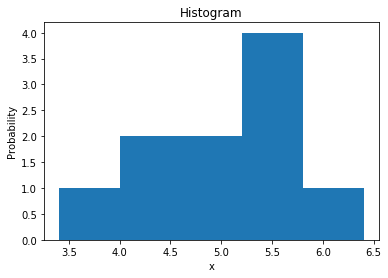

In [6]:
x = [np.sum(np.random.rand(10)) for _ in range(10)]
# Я поняла, что нужно 10 раз сложить 10 случайных чисел. Надеюсь, это именно то, что требует задание
print(x)
num_bins = 5
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')
plt.show()

3.

1) Дополните код Монте-Карло последовательности независимых испытаний
расчетом соответствующих вероятностей (через биномиальное распределение)
и сравните результаты.

2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в
последовательности из n независимых испытаний, взяв другие значения n и k.

In [7]:
def roulette_binomial_distr(n, k):
    zero, red, black = run_roulette(n)
    
    m = n-k

    P = {'zero': 1/37, 'red': 18/37, 'black': 18/37}
    Pnk = {}

    Cnk = math.factorial(n) / (math.factorial(k) *  math.factorial(m))

    for key, p in P.items():
        Pnk[key] = Cnk * p**k * (1-p)**m
        
    return Pnk

In [8]:
def print_distr(n, k):
    print(f'n = {n}, k = {k}, res = {roulette_binomial_distr(n, k)}')

print_distr(10, 4)
print_distr(10, 1)
print_distr(100, 50)

n = 10, k = 4, res = {'zero': 9.50642133227558e-05, 'red': 0.2156818898216137, 'black': 0.2156818898216137}
n = 10, k = 1, res = {'zero': 0.21120552079935692, 'red': 0.012079186118349074, 'black': 0.012079186118349074}
n = 100, k = 50, res = {'zero': 9.972557325080454e-51, 'red': 0.07673381768239178, 'black': 0.07673381768239178}


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [9]:
for p in itertools.permutations("01235", 5):
    print(''.join(str(x) for x in p))

01235
01253
01325
01352
01523
01532
02135
02153
02315
02351
02513
02531
03125
03152
03215
03251
03512
03521
05123
05132
05213
05231
05312
05321
10235
10253
10325
10352
10523
10532
12035
12053
12305
12350
12503
12530
13025
13052
13205
13250
13502
13520
15023
15032
15203
15230
15302
15320
20135
20153
20315
20351
20513
20531
21035
21053
21305
21350
21503
21530
23015
23051
23105
23150
23501
23510
25013
25031
25103
25130
25301
25310
30125
30152
30215
30251
30512
30521
31025
31052
31205
31250
31502
31520
32015
32051
32105
32150
32501
32510
35012
35021
35102
35120
35201
35210
50123
50132
50213
50231
50312
50321
51023
51032
51203
51230
51302
51320
52013
52031
52103
52130
52301
52310
53012
53021
53102
53120
53201
53210


In [10]:
for p in itertools.combinations("0123567", 5):
    print(''.join(p))

01235
01236
01237
01256
01257
01267
01356
01357
01367
01567
02356
02357
02367
02567
03567
12356
12357
12367
12567
13567
23567


5. Дополните код расчетом коэффициента корреляции x и y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


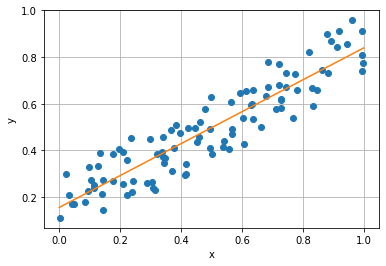

0.6834715483368783 0.15567690891055355
0.6834715483368786 0.15567690891055316
0.9176671813467412


In [11]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
plt.plot([0, 1], [b, a + b])
plt.show()

print(a, b)
print(a1, b1)

# Расчет коэффициента корреляции
xm = np.average(x)
ym = np.average(y)
numerator = np.sum(np.multiply(np.subtract(x, xm), np.subtract(y, ym)))
denominator = np.sqrt(np.multiply(np.sum(np.power(np.subtract(x, xm), 2)), np.sum(np.power(np.subtract(y, ym), 2))))
R = numerator/denominator
print(R)